<a href="https://colab.research.google.com/github/bluelikemilk/DL_AdvancedComptuerVision/blob/main/TF2_0_CIFAR_Improved_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.7.0


# Load data

In [16]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [17]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
# print the size of input and output
print('Input image shape: ', x_train[0].shape)
# normalize input data 
x_train = x_train / 255.0
x_test = x_test / 255.0
# calculate the number of class
K = len(set(y_train[:,0]))
print("Number of class: ", K)

Input image shape:  (32, 32, 3)
Number of class:  10


# Build the model

In [19]:
# model layers
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i) # use same padding to make sure image does not shrink
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x) # use pooling to enable Conv to extract higher level feature
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [20]:
# compile model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 34s 21ms/step - loss: 1.3120 - accuracy: 0.5473 - val_loss: 1.1149 - val_accuracy: 0.6166
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8496 - accuracy: 0.7064 - val_loss: 0.9039 - val_accuracy: 0.6886
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6934 - accuracy: 0.7613 - val_loss: 0.7495 - val_accuracy: 0.7441
Epoch 4/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5882 - accuracy: 0.7989 - val_loss: 0.7362 - val_accuracy: 0.7524
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4980 - accuracy: 0.8280 - val_loss: 0.6371 - val_accuracy: 0.7923
Epoch 6/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.4233 - accuracy: 0.8552 - val_loss: 0.5678 - val_accuracy: 0.8115
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3568 - accuracy: 0.8763 - val_loss: 0.6321 -

KeyboardInterrupt: ignored

In [21]:
# Use data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
# If you run the previous model.fit before this call, it will CONTINUE training where it left off
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 58s 37ms/step - loss: 0.6140 - accuracy: 0.7998 - val_loss: 0.5825 - val_accuracy: 0.8095
Epoch 2/50
1562/1562 [==============================] - 56s 36ms/step - loss: 0.5196 - accuracy: 0.8258 - val_loss: 0.5197 - val_accuracy: 0.8305
Epoch 3/50
1562/1562 [==============================] - 57s 37ms/step - loss: 0.4853 - accuracy: 0.8353 - val_loss: 0.4787 - val_accuracy: 0.8420
Epoch 4/50
1562/1562 [==============================] - 57s 36ms/step - loss: 0.4520 - accuracy: 0.8454 - val_loss: 0.5089 - val_accuracy: 0.8318
Epoch 5/50
1562/1562 [==============================] - 57s 37ms/step - loss: 0.4299 - accuracy: 0.8522 - val_loss: 0.4536 - val_accuracy: 0.8484
Epoch 6/50
1562/1562 [==============================] - 56s 36ms/step - loss: 0.4089 - accuracy: 0.8602 - val_loss: 0.4646 - val_accuracy: 0.8461
Epoch 7/50
1562/1562 [==============================] - 57s 36ms/step - loss: 0.3924 - accuracy: 0.8658 - val_loss: 0.5027 -

# Plot model accuracy and loss

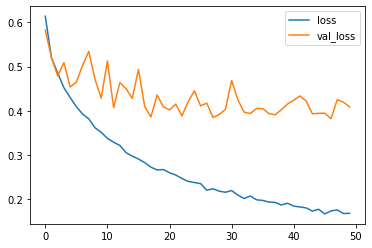

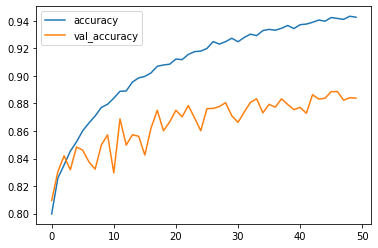

In [22]:
# plot accuracy and loss
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Model summary

In [ ]:
model.summary()